<a href="https://colab.research.google.com/github/Sharonayodele/neural-_network_classification/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification
Classification problem involves predicting whether something is one thing or another.
Binary classificatiopn: involves only two options
Multilclass classification:more than two options e.g a food or a dog or a car
Mulitlabel classification: what category should an element be labelled as: e.g what type of genre should a song be classified as.

#What i'm going to be covering in this section
Ill be using two different data sets to work on binary and mutliclass problems
#BINARY PROBLEM
- Inputs and outputs tensors of classifications problems
- Architecture of a NN classification with tensorflow
- getting data and visualizing the data
- checking the inout and output shapes of our models
- building a basic model
- improving the models
-creating a function to visualize our predictions
- Non linearity: building our model with non linearity
- Replicating/building non linear activation functions from scratch
- Getting results in less time by tweaking the learning rate
- using callbacks to find a model ideal learning rate
- more classification evaluation metrics
- finding the accuracy
- creating a confusion matrix
#MULTICLASS PROBLEM
- Becoming one with the data
- building a multiclass model
- improving performance by normalization
- findinf the ideal learning rate
- model evaluation
- creating a confusion matrix
- visualizing model predictions


#Architecture of classification neural network
#Binary
1. Input layer shape: same as features
2. Hidden layers: problem specific
3. Neuron per hidden layer: 1-100
4. Output layer shape: 1
5. Hidden activation: Relu(rectified linear unit)
6. Output activation: Sigmoid
7. Loss function: Binary.Crosentropy
8. optimizer: SGD(stochastic gradient descent)

#Multiclass
1.Input layer shape: same as features
2. Hidden layers: problem specific
3. Neuron per hidden layer: 1-100
4. Output layer shape: 1 per class
5. Hidden activation: Relu(rectified linear unit)
6. Output activation: Softmax
7. Loss function: categorical.Crosentropy
8. optimizer: SGD(stochastic gradient descent)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
X.shape

(1000, 2)

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#Mkae datafrane of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
#chcek the labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

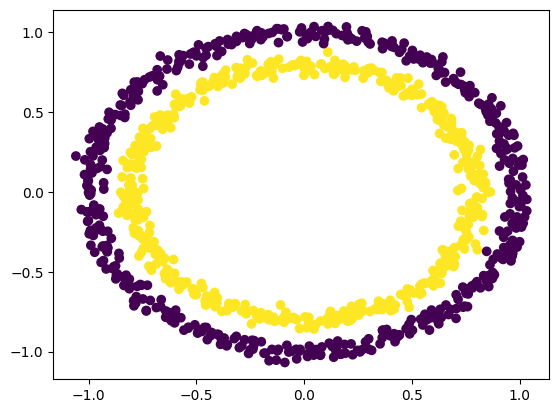

In [ ]:
#two values thus binary
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#Now let's model
#for reproducbility
tf.random.set_seed(42)

#create model
model_circle = tf.keras.Sequential([
    tf.keras.layers.Dense(2)
])
#complle model
model_circle.compile(loss=tf.keras.losses.binary_crossentropy,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])
#fit the model
model_circle.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 9s 3ms/step - loss: 5.7228 - accuracy: 0.4830
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 6.5636 - accuracy: 0.4650
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 7.6686 - accuracy: 0.5000
Epoch 11/20
32/32 [

Looking at the accuracy metrics, the model is approx gueesing. so let's train for longer

In [ ]:
model_circle.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_circle.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6685 - accuracy: 0.5000


[7.668547630310059, 0.5]

Even though our loss reduced, the accuracy is basically the model guessing.

#Improving the model:
1. add more layers
2. add more hidden units
3. train for longer
4. change the hyperparameters
5. nornalize data
we already trained for longer and the data looks normalized so we're left with 3 options.

In [ ]:
#lets add another layer
tf.random.set_seed(42)

model_circle1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_circle1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.SGD(),
                      metrics=['accuracy'])

model_circle1.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.6461 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5020
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5030
Epoch 11/

#Wahalurrr!
our model is still guessing. so lets add another layer, add more hidden units and change the optimizer to Adam()

In [ ]:
#model 3
tf.random.set_seed(42)

model_circle2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100), # add 100 dense neurons
     tf.keras.layers.Dense(10), # add another layer with 10 neurons
     tf.keras.layers.Dense(1)
])

model_circle2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics='accuracy')

model_circle2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.1701 - accuracy: 0.4540
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7192 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4660
Epoch 11/

Well we've tried a few things to improve our model but still the same results... no improvement. Only option is to visualize our model and inspect what could be going wwrong.

#Plot decision boundary

To visualize our model, i'll create a function #plot_decision_boundary

- Takes in a trained model, features (X) and labels (y).
- Creates a meshgrid of the different X values.
- Makes predictions across the meshgrid.
- Plots the predictions as well as a line between the different zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  #define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  #create X values (we're going to predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #make predictions using the trained models
  y_pred = model.predict(x_in)
  #check for multi class
  #check the final dimension of the model's output shape,
  #if it is > (greater than) 1, it's multi-class
  if model.output.shape[-1] > 1:
    print("doing multiclass classification...")
    #then we have to reshape the predictions for the plotting(e.g from [3,1]>>[1,3])
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) #get the max value of y and reshape
  else:
    print("doing binary clasification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing binary clasification...


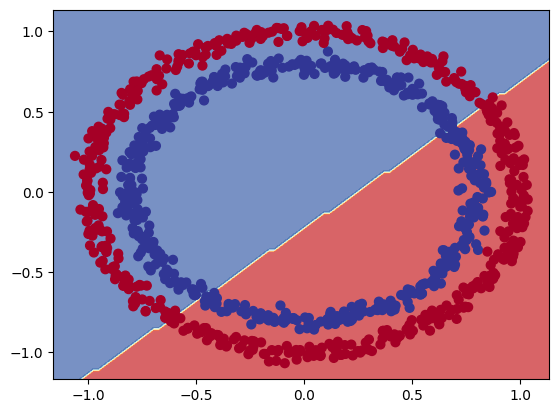

In [ ]:
plot_decision_boundary(model_circle2, X, y)

Our model is trying to use a straight line through the data. Linear activation?yes. So let's try a non linear activation.

#Non linearity
Sigmiod activation function

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
tf.random.set_seed(42)

model_circle3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1, activation=tf.sigmoid)
])

model_circle3.compile(loss=tf.keras.losses.binary_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

model_circle3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.9185 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8615 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8200 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7908 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7696 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7412 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7329 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.4960
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary clasification...


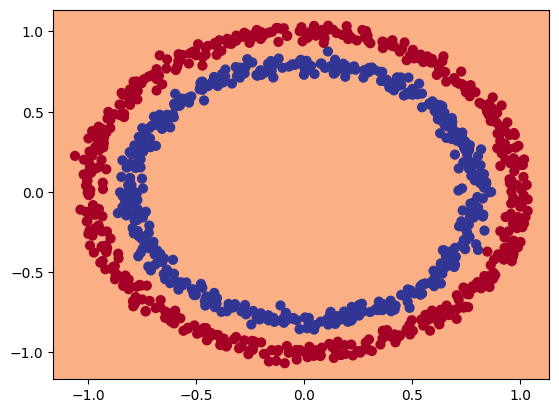

In [ ]:
plot_decision_boundary(model_circle3,X, y)

The problem might be that the activation function of the hidden layers are linear. lets try to change the activation of the hidden layers

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
from tensorflow.python.ops.gen_nn_ops import Relu
tf.random.set_seed(42)

model_circle4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), #activation=Relu, input_shape=(1000,2)
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),  #activation=Relu
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_circle4.compile(loss=tf.keras.losses.binary_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

history = model_circle4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7015 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4960
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5120
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 11/

Boom!! That was the solution. Our input and hidden layers were using a linear activation for a non linear problem. We didn't need to train ther model for more than 62 epochs.

313/313 [==============================] - 1s 2ms/step
doing binary clasification...


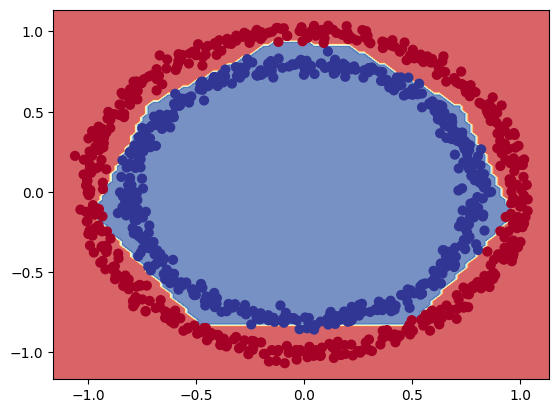

In [ ]:
plot_decision_boundary(model_circle4, X, y)

Our model is almost perfect.
The combination of klinear and non linear functions is a key fundamentak is nueal networks.
The defaulr kearniunf rate is Adam optimizer is -.001, if we incerasaed it by 10x to 0.01, we cab lower the epoch.

#Plot the loss curves

In [ ]:
loss_pd = pd.DataFrame(history.history)

Text(0, 0.5, 'loss')

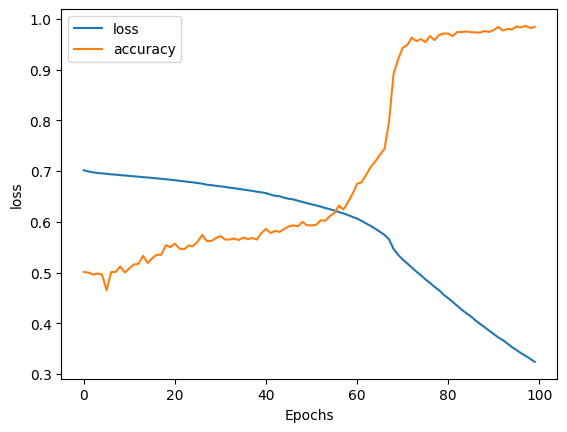

In [ ]:
loss_pd.plot()
plt.xlabel('Epochs')
plt.ylabel('loss')

#Learning rate call backs
How to find the optimal learning rate

In [ ]:
tf.random.set_seed(42)

model_circle5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), #activation=Relu, input_shape=(1000,2)
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),  #activation=Relu
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_circle5.compile(loss=tf.keras.losses.binary_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])
#create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# start lr from 1e-4 and increase by 10**(epoch/20) for every epoch

history1 = model_circle5.fit(X, y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6986 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5040 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.5060 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5110 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5140 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5160 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5130 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss:

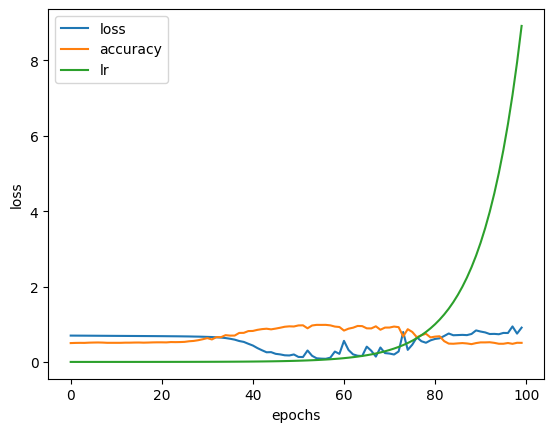

In [ ]:
#check history and plot
los_pd1 = pd.DataFrame(history1.history).plot(xlabel="epochs", ylabel='loss')

We need to find the infliction point where the axxxuracy goes up where the loss goes down. To find out where the the infliction pOint is, we can plot the loss versus the log_scale learning rate.


#PLOT THE LEARNNG RATE VS LOSS


Text(0.5, 1.0, 'Learning rate vs loss')

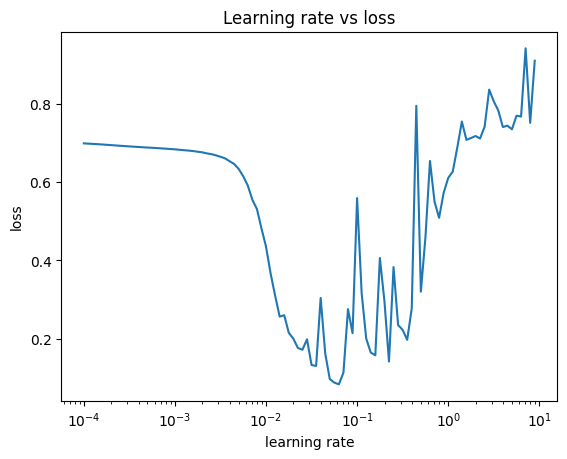

In [ ]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.semilogx(lrs, history1.history['loss'])  # we want the x-axis (learning rate) to be log scale
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs loss')


The ideal learning rate shold be the lowest point of the curve but it has to be where the loss is still decreasing

In [ ]:
#other examples of LR
10**0, 10**-1, 10**-2, 1E-4

(1, 0.1, 0.01, 0.0001)

From the plot the ideal learning rate is approx 0.002. so let's refit.

In [ ]:
tf.random.set_seed(42)

model_circle6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,  activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_circle6.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                      metrics=['accuracy'])

#fit the model for 20 epochs
history2 = model_circle6.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.5090
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5840
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6310
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.7030
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5702 - accuracy: 0.7330
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7790
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.8200
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8320
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8490
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8430
Epoch 11/20
32/32 [

Great the model performs well.

#More classiification evaluation metrics
include:
- accuracy
- precision
- recall
- confusion matrix
- classification report

In [ ]:
#Accuracy
len(X), len(y)

(1000, 1000)

In [ ]:
X_test = X[800:]
y_test = y[800:]
X_test.shape, y_test.shape

((200, 2), (200,))

In [ ]:
loss, accuracy = model_circle6.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9800


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_pred6 = model_circle6.predict(X_test)

confusion_matrix(y_test, y_pred6)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

y_pred is in decimal, so we round up the nearest whole number

In [ ]:
ypred_round = tf.round(y_pred6)
ypred_round[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, ypred_round)

array([[97,  4],
       [ 0, 99]])

Let's beautify it by creating a function to plot a confusion matrix

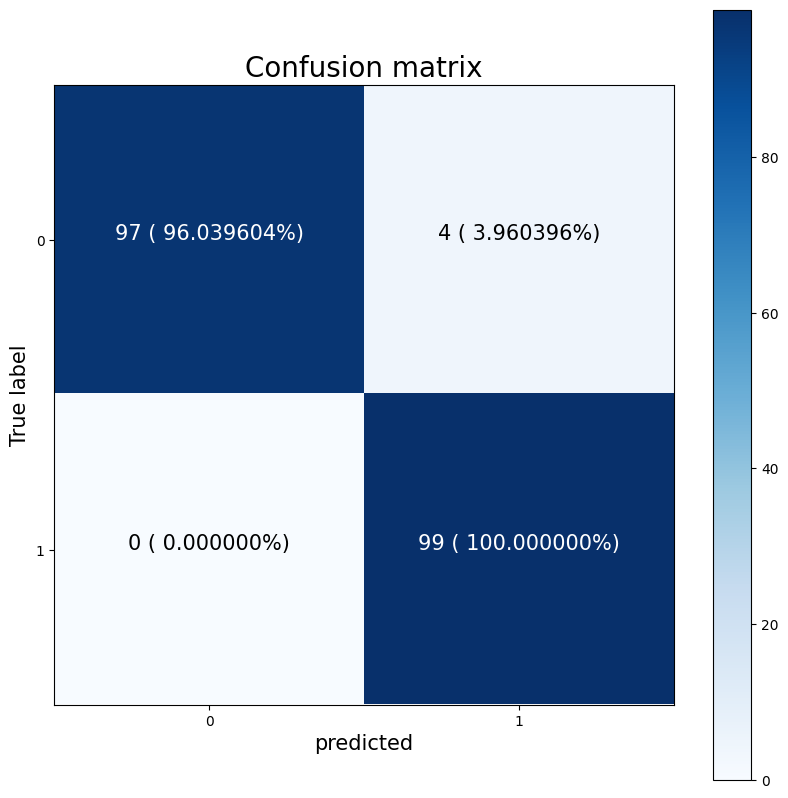

In [ ]:

import itertools

figsize = (10, 10)

#create a confusion matrix
cm = confusion_matrix(y_test,  tf.round(y_pred6))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #nromalize cm by divind by sum of cm
n_classes = cm.shape[0]

#add color
fig, ax = plt.subplots(figsize=figsize)
#create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create crosses
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#label the axes
ax.set(title="Confusion matrix",
       xlabel='predicted',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#set axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.title.set_size(20)

#threshhold for different colors
threshold = (cm.max() + cm.min()) / 2.

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100: 1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

#Multiclass classification: working with a larger example
Build a neural network to predict any particular clothing item

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_data.shape, train_labels.shape, test_labels.shape, test_data.shape

((60000, 28, 28), (60000,), (10000,), (10000, 28, 28))

In [ ]:
train_data.max(), train_data.min()

(255, 0)

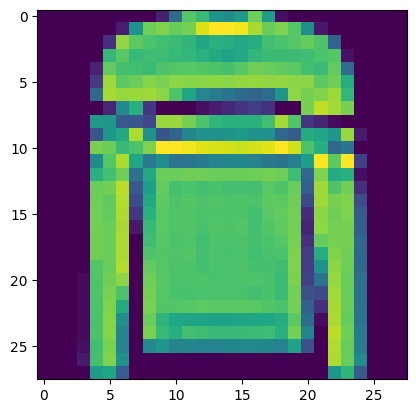

In [ ]:
#plot an example
import matplotlib.pyplot as plt
plt.imshow(train_data[5])

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
train_data[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
test_data[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

The data is raw and undefined

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']


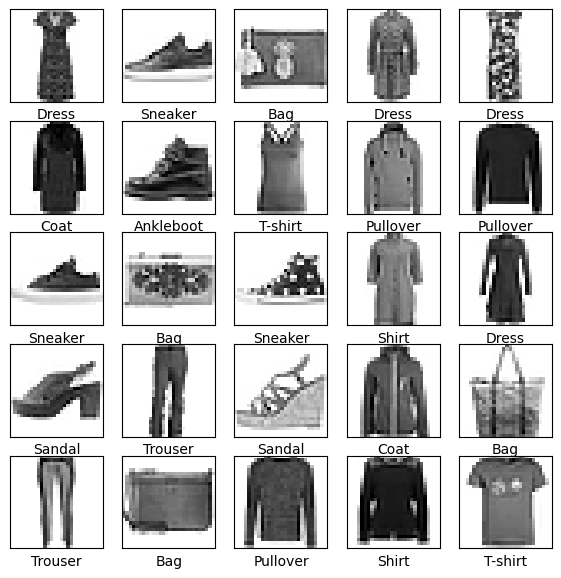

In [ ]:
#plot multiple random images of dataset
import random
plt.figure(figsize=(7,7))
for i in range(25):
  ax = plt.subplot(5,5, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[rand_index]])
plt.show()

Things note since this is a multiclass classification
- input shape: 28 by 28
- output shape: 10 for each class
  - output activation: softmax
- hyperparamter:
  - loss= sparescategoricalcrossentropy
_ well also use a validation_data

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#create a model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
non_norm_history = model_7.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8100 - accuracy: 0.3686 - val_loss: 1.3317 - val_accuracy: 0.4402
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2867 - accuracy: 0.4488 - val_loss: 1.2958 - val_accuracy: 0.4505
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2023 - accuracy: 0.4823 - val_loss: 1.1182 - val_accuracy: 0.5181
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0308 - accuracy: 0.5500 - val_loss: 0.9735 - val_accuracy: 0.5657
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9318 - accuracy: 0.5879 - val_loss: 0.9227 - val_accuracy: 0.6074
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9019 - accuracy: 0.6068 - val_loss: 0.9006 - val_accuracy: 0.6249
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8582 - accuracy: 0.6339 - val_loss: 0.8522 - val_accuracy:

In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 28)                21980     
                                                                 
 dense_19 (Dense)            (None, 14)                406       
                                                                 
 dense_20 (Dense)            (None, 10)                150       
                                                                 
Total params: 22536 (88.03 KB)
Trainable params: 22536 (88.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Lets improve the model by normalizing

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# well divide the train and test data by 255, to give a rande pf 0-1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Now let's model on the normalized data

In [ ]:
tf.random.set_seed(43)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#create a model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
norm_history = model_8.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5691 - accuracy: 0.8022 - val_loss: 0.4598 - val_accuracy: 0.8387
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4221 - accuracy: 0.8516 - val_loss: 0.4250 - val_accuracy: 0.8511
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3944 - accuracy: 0.8616 - val_loss: 0.4326 - val_accuracy: 0.8457
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3740 - accuracy: 0.8673 - val_loss: 0.4141 - val_accuracy: 0.8520
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3580 - accuracy: 0.8721 - val_loss: 0.4206 - val_accuracy: 0.8474
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3476 - accuracy: 0.8760 - val_loss: 0.3816 - val_accuracy: 0.8644
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8795 - val_loss: 0.3953 - val_accuracy:

our model was improved by normalizing it

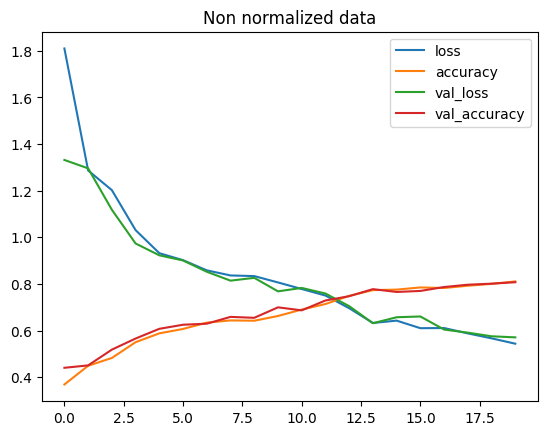

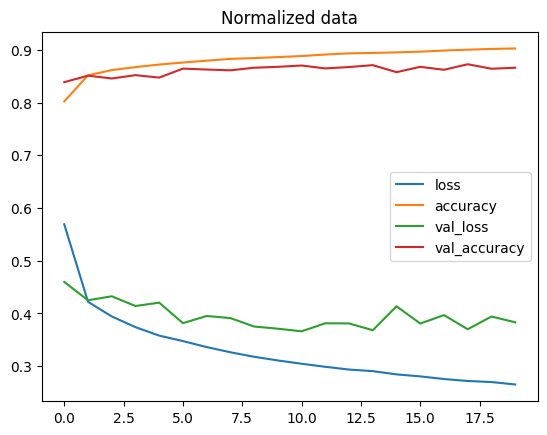

In [ ]:
#let's plot data loss curve
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");
plt.show()

#Ideal learning rate
lets find the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history_find = model_9.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5962 - accuracy: 0.7914 - val_loss: 0.4723 - val_accuracy: 0.8329 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4285 - accuracy: 0.8482 - val_loss: 0.4893 - val_accuracy: 0.8318 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3919 - accuracy: 0.8601 - val_loss: 0.4219 - val_accuracy: 0.8496 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3710 - accuracy: 0.8673 - val_loss: 0.4365 - val_accuracy: 0.8460 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3577 - accuracy: 0.8704 - val_loss: 0.4059 - val_accuracy: 0.8569 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3459 - accuracy: 0.8751 - val_loss: 0.4177 - val_accuracy: 0.8459 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'finding the ideal learning rate')

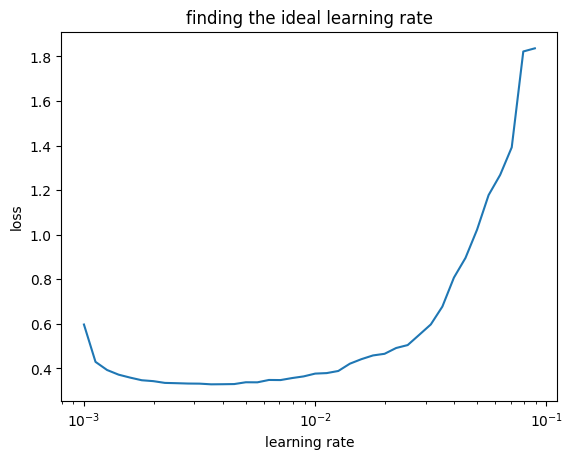

In [ ]:
#plot the learing rate curve
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, lr_history_find.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

the ideal learning rate is 0.008-0.007.
- Let's evaluate using the confusion matrix.
- And make some predictions through visualization.

In [ ]:
#plot_confusion_matrix function
import itertools
from sklearn.metrics import confusion_matrix

#our function needs a different name to plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20,20), text_size=15):
  """ makes a labelled confusion matrix comparing predictions and train labels.

  if classes is passed, confsuoin matrix will be labelled, if not integer class
  value will be used.

  Args:
    y_true: array of true labels(y_test must be same shape as y_pred)
    y_pred: ''    ''   ''    ''(same shape as y_true)
    classes: array of class labels (e.g string). If none, integer labels are used
    test_size: size of output figure
  returns:
    a labelled confusion matrix plot comparing y_true and y_pred
  example:
    make_confusion_matrix(y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    test_size=10)
  """
  #create a confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize it
  n_classes = cm.shape[0] #find the no of classses we're dealing with

  #plot the figure and color it
  fig, ax = plt.subplots(figsize=(15,15))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axes
  ax.set(title='confusion_matrix',
         xlabel='predictions',
         ylabel='true label',
         xticks=np.arange(n_classes),#create enough axis to plot alll classes
         yticks=np.arange(n_classes),
         xticklabels=labels, #axes will label with class names or int
         yticklabels=labels)

  #make x-axis labels appear on bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  #plol the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=text_size)


In [ ]:
y_probs = model_8.predict(test_data)

y_probs[:15]

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_data[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankleboot')

In [ ]:
#covert all predictions from probabilities to label
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Now lets create the confusion matrix


In [ ]:
#check out the non colored confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[877,   2,  10,   7,  10,   1,  72,   0,  21,   0],
       [  7, 974,   0,   8,   9,   0,   0,   0,   2,   0],
       [ 17,   4, 540,   4, 343,   0,  84,   0,   8,   0],
       [ 74,  12,   6, 722, 149,   0,  24,   0,  13,   0],
       [  0,   1,  19,   3, 927,   0,  45,   0,   4,   1],
       [  0,   0,   0,   0,   2, 861,   0,  41,  19,  77],
       [181,   5,  44,   6, 151,   0, 579,   0,  33,   1],
       [  0,   0,   0,   0,   0,  13,   0, 855,   4, 128],
       [  1,   0,   0,   1,   6,   1,   5,   3, 982,   1],
       [  0,   0,   0,   0,   0,   2,   1,   9,   0, 988]])

In [ ]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

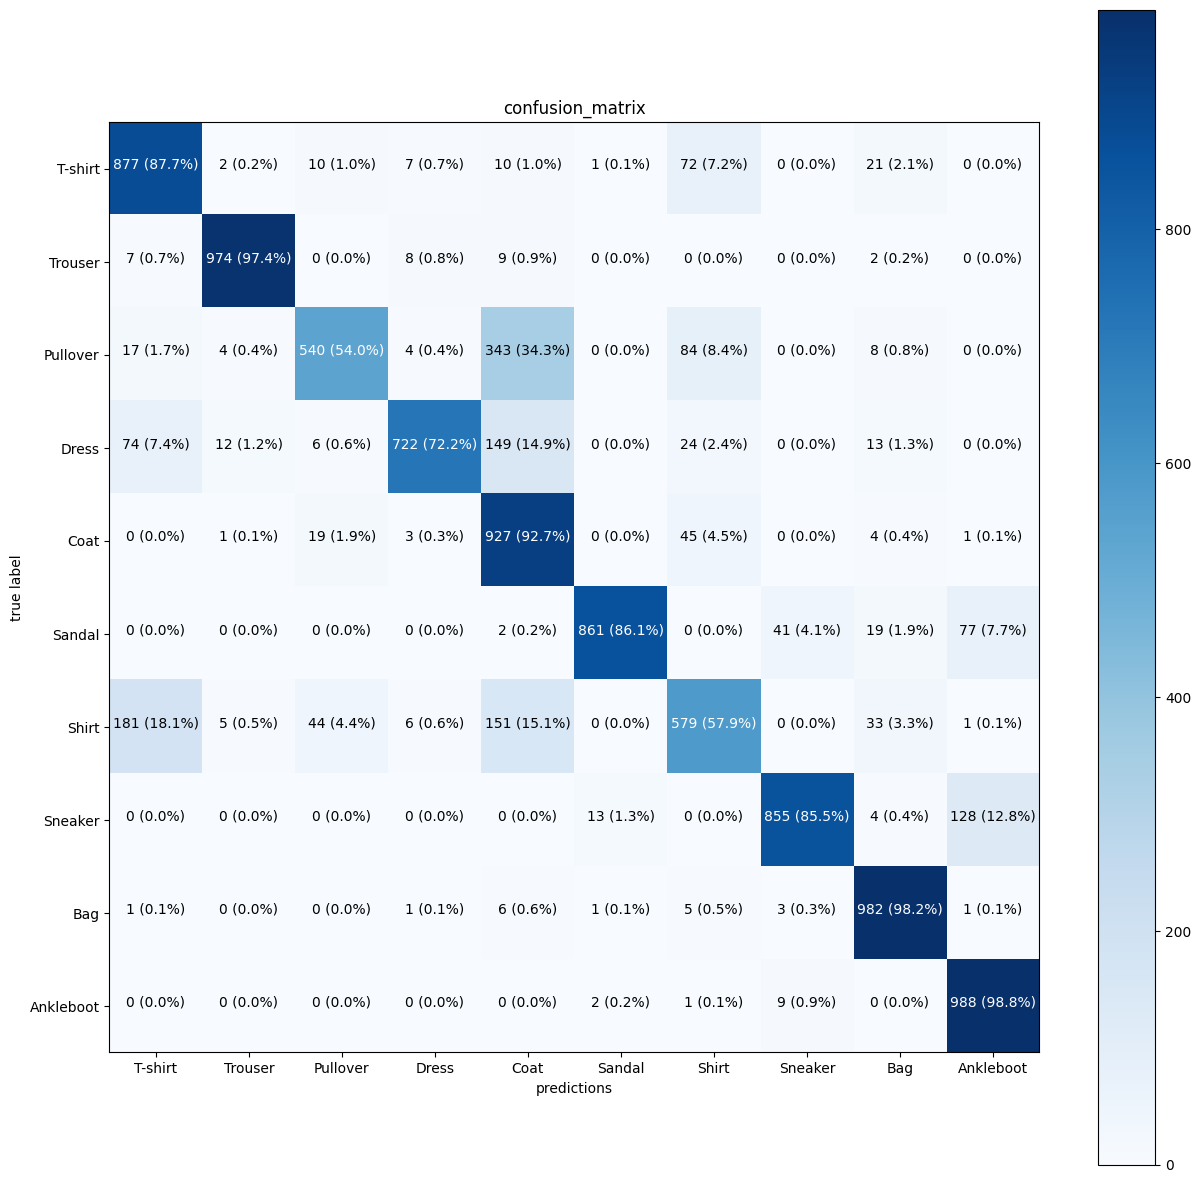

In [ ]:
#the colored confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,20), text_size=10)